# Определение перспективного тарифа для телеком-компании

***Описание проекта***

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

***Описание тарифов***
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

***Описание представленных данных***

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
/

***План работы***
- подготовка (предообработка) данных
- анализ данных
- проверка гипотез

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pd.options.display.max_columns = 200

In [3]:
try:
    calls = pd.read_csv('/datasets/calls.csv', sep=',')
except:
    calls = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/1 часть/Статистический анализ. Перспективный тариф/calls.csv', sep=',')

In [4]:
calls.info()
calls.head(10)
#alls['duration'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
try:
    internet = pd.read_csv('/datasets/internet.csv', sep=',')
except:
    internet = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/1 часть/Статистический анализ. Перспективный тариф/internet.csv', sep=',')

In [6]:
internet.info()
display(internet.columns)
display(internet['mb_used'].max())
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

1724.83

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
try:
    messages = pd.read_csv('/datasets/messages.csv', sep=',')
except:
    messages = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/1 часть/Статистический анализ. Перспективный тариф/messages.csv', sep=',')

In [8]:
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
except:
    tariffs = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/1 часть/Статистический анализ. Перспективный тариф/tariffs.csv', sep=',')

In [10]:
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
try:
    users = pd.read_csv('/datasets/users.csv', sep=',')
except:
    users = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/1 часть/Статистический анализ. Перспективный тариф/users.csv', sep=',')

In [12]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Выводы

Заметил, что 
- во всех ДФ тип данных столбцов с датами - object
- во всех ДФ значение в столбцах user_id - int64. Думаю, что надо перевести в object 
- имеется безликий столбец 'Unnamed: 0' в ДФ "internet" 
- также буду округлять секунды до минут в большую сторону в "calls" и переводить в int64, т.к. плата идет за минуты
- также заменю название столбца tariff в "users", чтобы можно было объединить с "tariffs"


## Подготовка данных

### Работа с типом данных


In [13]:
#замена типа данных в столбцах с датами
calls['call_date'] = calls['call_date'].astype('datetime64')
internet['session_date'] = internet['session_date'].astype('datetime64')
messages['message_date'] = messages['message_date'].astype('datetime64')
users['reg_date'] = users['reg_date'].astype('datetime64')
users['churn_date'] = users['churn_date'].astype('datetime64')

#хотел пройтись по списку из дф, но не додумался как
# dfs = [calls, internet, messages, users]
# for df in dfs:
#     if 'date' in df.columns:
#         df.columns = df.columns.astype('datetime64')
        
#замена типа данных в столбцах user_id
dfs = [calls, internet, messages, users]
for df in dfs:
    df['user_id'] = df['user_id'].astype('object')
    
#удаление столбца "Unnamed: 0" в ДФ "internet"
del internet['Unnamed: 0']

#округление минут в большую сторону и перевод в int
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

#замена название столбца в "users"
users = users.rename(columns={'tariff':'tariff_name'})

In [14]:
print(calls.info())
print(internet.info())
print(messages.info())
print(users.info())
calls.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 5.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


### Расчеты для каждого пользователя

In [15]:
#расчет количества и длительности звонков по месяцам
calls['month'] = calls['call_date'].dt.month #добавляю столбец звонков по месяцам
calls_user_id = calls.pivot_table(index=['user_id', 'month'], #количество и длительность звонков user_id по месяцам
                                  values='duration', aggfunc=['count', 'sum']).reset_index() 

calls_user_id.columns = ['user_id', 'month', 'count_call', 'sum_duration']
calls_user_id.head(10)
#calls['month'].value_counts()

,user_id,month,count_call,sum_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


In [16]:
#количество отправленных сообщений по месяцам
messages['month'] = messages['message_date'].dt.month #добавляю столбец сообщений по месяцам
messages_user_id = messages.pivot_table(index=['user_id', 'month'], #количество и длительность звонков user_id по месяцам
                                  values='id', aggfunc=['count']).reset_index()

messages_user_id.columns = ['user_id', 'month', 'count_messages'] #меняю название столбцов
messages_user_id.head(10)
#messages['month'].value_counts()

,user_id,month,count_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [17]:
#объем израсходованного интернет-трафика по месяцам
internet['month'] = internet['session_date'].dt.month
session_user_id = internet.pivot_table(index=['user_id', 'month'] #посчитал объем интернет-трафика за месяц в мб 
                                       , values='mb_used', aggfunc='sum').reset_index() 
session_user_id.columns = ['user_id', 'month', 'sum_session_mb']
session_user_id['sum_session_gb'] = (session_user_id['sum_session_mb'] / 
                                     1024).apply(np.ceil).astype('int') #перевел в гб и по условию округлил в большую сторону 

session_user_id.info()
session_user_id.head(10)

#internet['month'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3203 non-null   int64  
 1   month           3203 non-null   int64  
 2   sum_session_mb  3203 non-null   float64
 3   sum_session_gb  3203 non-null   int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 87.7 KB


,user_id,month,sum_session_mb,sum_session_gb
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
5,1000,10,14702.49,15
6,1000,11,14756.47,15
7,1000,12,9817.61,10
8,1001,11,18429.34,18
9,1001,12,14036.66,14


In [18]:
#объединение таблиц 
df1 = calls_user_id.merge(messages_user_id, 
                          on=['user_id', 'month'], how='outer') #объединение таблиц calls_user_id и messages_user_id

df2 = df1.merge(session_user_id, 
                on=['user_id', 'month'], how='outer') #объединение таблиц df1 и session_user_id 

df3 = users.merge(tariffs, on='tariff_name', how='outer') #объединение таблиц users и tariffs

final_df = df2.merge(df3, on='user_id', how='inner') #итоговая таблица со всеми данными и вычислениями

columns = ['month', 'count_call', 'sum_duration', 'count_messages', 'sum_session_mb', 'sum_session_gb']
for column in columns: #заполнил пропуски нулями
    final_df[column] = final_df[column].fillna(0)
    final_df[column] = final_df[column].astype('int')
    
final_df['user_id'] = final_df['user_id'].astype('int')

final_df.info()
final_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int32         
 1   month                  3214 non-null   int32         
 2   count_call             3214 non-null   int32         
 3   sum_duration           3214 non-null   int32         
 4   count_messages         3214 non-null   int32         
 5   sum_session_mb         3214 non-null   int32         
 6   sum_session_gb         3214 non-null   int32         
 7   age                    3214 non-null   int64         
 8   churn_date             187 non-null    datetime64[ns]
 9   city                   3214 non-null   object        
 10  first_name             3214 non-null   object        
 11  last_name              3214 non-null   object        
 12  reg_date               3214 non-null   datetime64[ns]
 13  tar

,user_id,month,count_call,sum_duration,count_messages,sum_session_mb,sum_session_gb,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,2253,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,23233,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,14003,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,14055,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,14568,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,57,350,73,14702,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,43,338,58,14756,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,46,333,70,9817,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,59,430,0,18429,18,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
9,1001,12,63,414,0,14036,14,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


In [19]:
#помесячная выручка с каждого пользователя

def revenue(row):
    revenue_by_month_sum = 0
    if row['minutes_included'] < row['sum_duration']:
        revenue_by_month_sum += (row['sum_duration'] - row['minutes_included']) * row['rub_per_minute']
    if row['messages_included'] < row['count_messages']:
        revenue_by_month_sum += (row['count_messages'] - row['messages_included']) * row['rub_per_message'] 
    if (row['mb_per_month_included']/1024) < row['sum_session_gb']:
        revenue_by_month_sum += (row['sum_session_gb'] - (row['mb_per_month_included']/1024)) * row['rub_per_gb']
    revenue_by_month_sum += row['rub_monthly_fee']
    return revenue_by_month_sum


final_df['revenue_by_month'] = final_df.apply(revenue, axis=1)
#final_df

### Выводы
- заменил тип данных в столбцах с датами на datetime64
- тип данных user_id поменял на object, т.к. считаю, что это более уместно
- удалил столбец "Unnamed: 0" в ДФ "internet"
- округлил минуты в большую сторону и перевел в int
- расчитал количество отправленных сообщений по месяцам по каждому пользователю
- расчитал объем израсходованного интернет-трафика по месяцам по каждому пользователю
- расчитал помесячную выручку с каждого пользователя

## Анализ данных


In [20]:
#final_df.head(10)

,tariff_name,month,sum_duration
0,smart,1,6931
1,smart,2,17324
2,smart,3,30034
3,smart,4,41119
4,smart,5,54618


,tariff_name,mean,var,std
0,smart,77631.416667,2.491282e+09,49912.744923
1,ultra,43227.000000,6.786517e+08,26050.944558


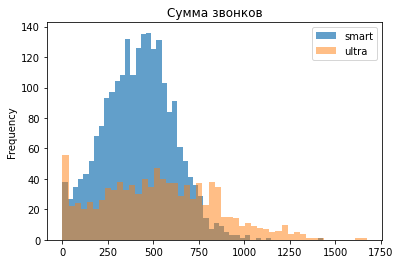

In [21]:
#кол-во минут разговора для каждой выборки в месяц
call_by_month = final_df.pivot_table(index=['tariff_name', 'month'], values='sum_duration', aggfunc='sum').reset_index()
display(call_by_month.head())

#расчет среднего, дисперсии и старндартного отклонения
tariff_calls_by_month = call_by_month.pivot_table(index=['tariff_name'], values='sum_duration', aggfunc=['mean', 'var', 'std']).reset_index()
tariff_calls_by_month.columns = ['tariff_name','mean', 'var', 'std']
display(tariff_calls_by_month)

#строю гистограммы по выборкам
smart_by_month = final_df.query('tariff_name == "smart"')
ultra_by_month = final_df.query('tariff_name == "ultra"')
smart_by_month['sum_duration'].plot(kind='hist', bins=50, alpha=0.7, title='Сумма звонков')
ultra_by_month['sum_duration'].plot(kind='hist', alpha=0.5, bins=50)
plt.legend(['smart', 'ultra'])
plt.show()

**По гистограммам можно сказать, что распределение нормальное в обоих случаях. Пользователи тарифа smart полноценно используют свой тариф, нежели пользователи ultra. Большое кол-во пользователей тарифа smart укладываются в тарифный план в 500 минут, тогда как пользователи тарифа ultra не постоянны в использовании своих минут, но за предел в 3000 минут не выходят.**

,tariff_name,month,count_messages
0,smart,1,620
1,smart,2,1397
2,smart,3,2453
3,smart,4,3443
4,smart,5,4762


,tariff_name,mean,var,std
0,smart,6201.083333,1.437160e+07,3790.989687
1,ultra,4051.916667,8.057361e+06,2838.549036


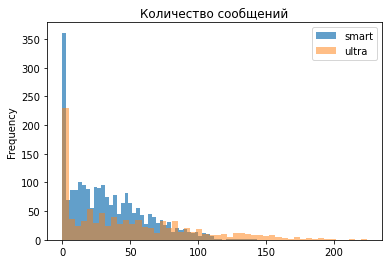

In [22]:
#кол-во сообщений для каждой выборки в месяц
messages_by_month = final_df.pivot_table(index=['tariff_name', 'month'], values='count_messages', aggfunc='sum').reset_index()
display(messages_by_month.head())

#расчет среднего, дисперсии и старндартного отклонения
tariff_messages_by_month = messages_by_month.pivot_table(index=['tariff_name'], values='count_messages', aggfunc=['mean', 'var', 'std']).reset_index()
tariff_messages_by_month.columns = ['tariff_name','mean', 'var', 'std']
display(tariff_messages_by_month)

#строю гистограммы по выборкам
smart_by_month['count_messages'].plot(kind='hist', bins=50, alpha=0.7, title='Количество сообщений')
ultra_by_month['count_messages'].plot(kind='hist', alpha=0.5, bins=50)
plt.legend(['smart', 'ultra'])
plt.show()

**Видно, что большая часть клиентов у обоих тарифов мало используют сообщения. Можно сказать, что распределение сообщений одинаково.**

,tariff_name,month,sum_session_gb
0,smart,1,297
1,smart,2,687
2,smart,3,1173
3,smart,4,1526
4,smart,5,2243


,tariff_name,mean,var,std
0,smart,3033.083333,3.697771e+06,1922.958821
1,ultra,1600.166667,9.025132e+05,950.006970


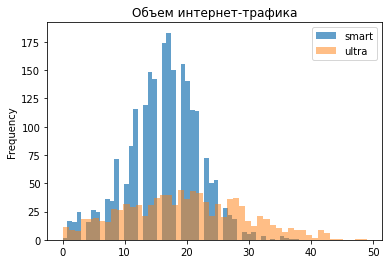

In [23]:
#объем интернет-трафика для каждой выборки в месяц
session_by_month = final_df.pivot_table(index=['tariff_name', 'month'], values='sum_session_gb', aggfunc='sum').reset_index()
display(session_by_month.head())

#расчет среднего, дисперсии и старндартного отклонения
tariff_session_by_month = session_by_month.pivot_table(index=['tariff_name'], values='sum_session_gb', aggfunc=['mean', 'var', 'std']).reset_index()
tariff_session_by_month.columns = ['tariff_name','mean', 'var', 'std']
display(tariff_session_by_month)

#строю гистограммы по выборкам
smart_by_month['sum_session_gb'].plot(kind='hist', bins=50, alpha=0.7, title='Объем интернет-трафика')
ultra_by_month['sum_session_gb'].plot(kind='hist', alpha=0.5, bins=50)
plt.legend(['smart', 'ultra'])
plt.show()

**На данной гистограмме также наблюдается нормальное распределение. У тарифа smart пик гистограмы приходится на 16-17 гб, когда лимит для данного тарифа в 15 гб. Возможно, им необходимо пересмотреть свой тарифный план, а может и нет.
Пользователи тарифа ultra в среднем тратят около 20гб интернет-трафика, но также есть определенное кол-во пользователей, которым не хватает предоставленного трафика.**

### Выводы

- сделал расчет минут разговора, кол-ва сообщений и объёма интернет-трафика для каждого тарифа в месяц
- посчитал среднее количество, дисперсию и стандартное отклонение для данных показателей
- построил и сравнил гистрограммы для тарифов smart и ultra 

## Проверка гипотез

### Гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

- Нулевая гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны"
- Альтернативная гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны"

In [24]:
average_revenue = final_df.pivot_table(index='tariff_name', values='revenue_by_month').reset_index() #сводная таблица по тарифу
average_revenue.columns = ['tariff_name', 'average_revenue_by_month']#с расчетом средней выручки пользователей
display(average_revenue)

# проверяю гипотезу о равенстве 2-х генеральных совокупностей
average_smart = final_df.query('tariff_name == "smart"')
average_ultra = final_df.query('tariff_name == "ultra"')
alpha = .01

results = st.ttest_ind(average_smart['revenue_by_month'], average_ultra['revenue_by_month'], equal_var=False)
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны"')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны"') 
    

,tariff_name,average_revenue_by_month
0,smart,1289.973531
1,ultra,2070.152284


p-значение 4.2606313931076085e-250
Отвергаем нулевую гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны"


**По полученной вероятности можно делать выводы о значимом различии между выборками.**

### Гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

- Нулевая гипотеза: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов"
- Альтернативная гипотеза: "Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов"

In [25]:
# проверяю гипотезу о равенстве 2-х генеральных совокупностей
average_moscow = final_df.query('city == "Москва"')
average_other_city = final_df.query('city != "Москва"')
alpha = .01

results = st.ttest_ind(average_moscow['revenue_by_month'], average_other_city['revenue_by_month'], equal_var=False)
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вероятность равенства средних выручек пользователей из Москвы и из регионов составляет 26%. Можно считать это большой вероятностью равенства.**

### Выводы

- проверил две гипотезы по средним выручкам по категориям тарифа и местожительству пользователей.

## Общий вывод

   **Большое кол-во пользователей тарифа smart укладываются в тарифный план в 500 минут, тогда как пользователи тарифа ultra не постоянны в использовании своих минут, но за предел в 3000 минут не выходят.**

   **Видно, что большая часть клиентов у обоих тарифов мало используют сообщения. Можно сказать, что распределение сообщений одинаково.**

   **У тарифа smart пик гистограмы приходится на 16-17 гб, когда лимит для данного тарифа в 15 гб. Возможно, им необходимо пересмотреть свой тарифный план, а может и нет.
Пользователи тарифа ultra в среднем тратят около 20гб интернет-трафика, но также есть определенное кол-во пользователей, которым не хватает предоставленного трафика.**

**По полученным данным можно сделать вывод, что для телеком-компании более переспективный тариф ultra, т.к. малая вероятность, что средняя выручка для двух тарифов одинакова. Также следует сказать, что регион мало влияет на среднуюю выручку пользователей.**